# Modeling
***
Importing modules, data, and some preprocessing

In [791]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob
import os

import sklearn
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

//anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [3]:
#I like my graphs big thank you very much
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['figure.figsize'] = (15,9)

In [7]:
#I needed to be able to see all rows/columns of my dataframes to check for duplicates
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [24]:
with open("finalfeatures","rb") as pickle_in:
    X = pickle.dump(pickle_in)
with open("finaltarget","rb") as pickle_in:
    y = pickle.dump(pickle_in)

In [32]:
#Functions for modeling
def scale(X_train, X_test):
    std = StandardScaler()
    std.fit(X_train.values)
    X_tr = std.transform(X_train.values)
    X_te = std.transform(X_test.values)
    
    return X_tr, X_te

In [161]:
#Typical train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [74]:
#Preserving column names to plot feature importance later
columns = X_train.columns.tolist()
X_tr2 = pd.DataFrame(X_tr)
X_tr2.columns = columns

### Let the Modeling Begin!

In [163]:
lr = LinearRegression()
lr.fit(X_tr, y_train)
print("The mean absolute error for ordinary linear regression is")
print("Training: {:6.5f}".format(mean_absolute_error(lr.predict(X_tr), y_train)))
print("Test Set: {:6.5f}".format(mean_absolute_error(lr.predict(X_te), y_test)))

The mean absolute error for ordinary linear regression is
Training: 2.04801
Test Set: 2.03935


In [80]:
ridge = Ridge(alpha = 1)
ridge.fit(X_tr, y_train)
print("The mean absolute error for ordinary ridge regression is")
print("Training: {:6.5f}".format(mean_absolute_error(ridge.predict(X_tr), y_train)))
print("Test Set: {:6.5f}".format(mean_absolute_error(ridge.predict(X_te), y_test)))

The mean absolute error for ordinary ridge regression is
Training: 2.04891
Test Set: 2.03809


In [81]:
lasso = Lasso(alpha = 0.005, max_iter = 10000)
lasso.fit(X_tr, y_train)
print("The mean absolute error for ordinary lasso regression is")
print("Training: {:6.5f}".format(mean_absolute_error(lasso.predict(X_tr), y_train)))
print("Test Set: {:6.5f}".format(mean_absolute_error(lasso.predict(X_te), y_test)))

The mean absolute error for ordinary lasso regression is
Training: 2.05688
Test Set: 2.04862


In [82]:
eln = ElasticNet(alpha = 0.005, max_iter = 10000)
eln.fit(X_tr, y_train)
print("The mean absolute error for ordinary lasso regression is")
print("Training: {:6.5f}".format(mean_absolute_error(eln.predict(X_tr), y_train)))
print("Test Set: {:6.5f}".format(mean_absolute_error(eln.predict(X_te), y_test)))

The mean absolute error for ordinary lasso regression is
Training: 2.05601
Test Set: 2.04916


In [83]:
sgd = SGDRegressor(alpha = .5)
sgd.fit(X_tr, y_train)
print("The mean absolute error for ordinary lasso regression is")
print("Training: {:6.5f}".format(mean_absolute_error(sgd.predict(X_tr), y_train)))
print("Test Set: {:6.5f}".format(mean_absolute_error(sgd.predict(X_te), y_test)))

The mean absolute error for ordinary lasso regression is
Training: 2.13328
Test Set: 2.11550


In [84]:
svm = SVR()
svm.fit(X_tr, y_train)
print("The mean absolute error for support vector machine regression is")
print("Training: {:6.5f}".format(mean_absolute_error(svm.predict(X_tr), y_train)))
print("Test Set: {:6.5f}".format(mean_absolute_error(svm.predict(X_te), y_test)))

The mean absolute error for support vector machine regression is
Training: 1.95364
Test Set: 2.00306


In [85]:
tree = DecisionTreeRegressor()
tree.fit(X_tr, y_train)
print("The mean absolute error for decision tree regression is")
print("Training: {:6.5f}".format(mean_absolute_error(tree.predict(X_tr), y_train)))
print("Test Set: {:6.5f}".format(mean_absolute_error(tree.predict(X_te), y_test)))

The mean absolute error for decision tree regression is
Training: 0.00000
Test Set: 2.82349


In [86]:
br = BaggingRegressor()
br.fit(X_tr, y_train)
print("The mean absolute error for bagging regression is")
print("Training: {:6.5f}".format(mean_absolute_error(br.predict(X_tr), y_train)))
print("Test Set: {:6.5f}".format(mean_absolute_error(br.predict(X_te), y_test)))

The mean absolute error for bagging regression is
Training: 0.81818
Test Set: 2.13328


In [87]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_tr, y_train)
print("The mean absolute error for random forest regression is")
print("Training: {:6.5f}".format(mean_absolute_error(rf.predict(X_tr), y_train)))
print("Test Set: {:6.5f}".format(mean_absolute_error(rf.predict(X_te), y_test)))

The mean absolute error for random forest regression is
Training: 0.74831
Test Set: 2.08882


In [88]:
xgb = XGBRegressor()
xgb.fit(X_tr, y_train)
print("The mean absolute error for xgb regression is")
print("Training: {:6.5f}".format(mean_absolute_error(xgb.predict(X_tr), y_train)))
print("Test Set: {:6.5f}".format(mean_absolute_error(xgb.predict(X_te), y_test)))

The mean absolute error for xgb regression is
Training: 1.74657
Test Set: 2.05558


In [352]:
xgb = XGBRegressor(colsample_bytree=0.56, learning_rate=.01,
                     max_bin= 255, n_estimators= 200, num_leaves= 20, 
                     subsample= 0.6)
xgb.fit(X_tr, y_train)
print("The mean absolute error for xgb regression is")
print("Training: {:6.5f}".format(mean_absolute_error(xgb.predict(X_tr), y_train)))
print("Test Set: {:6.5f}".format(mean_absolute_error(xgb.predict(X_te), y_test)))

The mean absolute error for xgb regression is
Training: 2.01230
Test Set: 2.04945


This was the winner!

In [669]:
lgbm = LGBMRegressor(colsample_bytree=0.56,
                     max_bin= 255, n_estimators= 120, num_leaves= 9, 
                     objective= 'mean_absolute_error', subsample= 0.7)
lgbm.fit(X_tr2, y_train)
print("The mean absolute error for light gradient boost method regression is")
print("Training: {:6.5f}".format(mean_absolute_error(lgbm.predict(X_tr), y_train)))
print("Test Set: {:6.5f}".format(mean_absolute_error(lgbm.predict(X_te), y_test)))

The mean absolute error for light gradient boost method regression is
Training: 1.68327
Test Set: 1.99871


In [666]:
lgbm = LGBMRegressor(colsample_bytree=0.4, learning_rate=.1, reg_alpha= 1, reg_lambda= 1,
                     max_bin= 255, n_estimators= 150, num_leaves=7, 
                     objective = 'mean_absolute_error', subsample= 0.7)
lgbm.fit(X_tr2, y_train)
print("The mean absolute error for light gradient boost method regression is")
print("Training: {:6.5f}".format(mean_absolute_error(lgbm.predict(X_tr), y_train)))
print("Test Set: {:6.5f}".format(mean_absolute_error(lgbm.predict(X_te), y_test)))

The mean absolute error for light gradient boost method regression is
Training: 1.72569
Test Set: 2.00617


In [ ]:
lgbm = LGBMRegressor(colsample_bytree=0.4, learning_rate=0.1, reg_alpha= 1, reg_lambda= 1,
                     max_bin= 255, n_estimators= 150, num_leaves= 7, 
                     objective= 'mean_absolute_error', subsample= 0.7)
lgbm.fit(X_tr, y_train)
print("The mean absolute error for light gradient boost method regression is")
print("Training: {:6.5f}".format(mean_absolute_error(lgbm.predict(X_tr), y_train)))
print("Test Set: {:6.5f}".format(mean_absolute_error(lgbm.predict(X_te), y_test)))

In [52]:
cat = CatBoostRegressor()
cat.fit(X_tr, y_train)
print("The mean absolute error for cat boost regression is")
print("Training: {:6.5f}".format(mean_absolute_error(cat.predict(X_tr), y_train)))
print("Test Set: {:6.5f}".format(mean_absolute_error(cat.predict(X_te), y_test)))

0:	learn: 3.6146145	total: 86.3ms	remaining: 1m 26s
1:	learn: 3.5697538	total: 101ms	remaining: 50.3s
2:	learn: 3.5270232	total: 116ms	remaining: 38.5s
3:	learn: 3.4858975	total: 130ms	remaining: 32.3s
4:	learn: 3.4467712	total: 144ms	remaining: 28.7s
5:	learn: 3.4094619	total: 166ms	remaining: 27.6s
6:	learn: 3.3722699	total: 199ms	remaining: 28.2s
7:	learn: 3.3387448	total: 231ms	remaining: 28.7s
8:	learn: 3.3039510	total: 266ms	remaining: 29.2s
9:	learn: 3.2736701	total: 300ms	remaining: 29.7s
10:	learn: 3.2438195	total: 346ms	remaining: 31.1s
11:	learn: 3.2163621	total: 391ms	remaining: 32.2s
12:	learn: 3.1902858	total: 415ms	remaining: 31.5s
13:	learn: 3.1634362	total: 453ms	remaining: 31.9s
14:	learn: 3.1383971	total: 489ms	remaining: 32.1s
15:	learn: 3.1161958	total: 530ms	remaining: 32.6s
16:	learn: 3.0915982	total: 572ms	remaining: 33.1s
17:	learn: 3.0713053	total: 607ms	remaining: 33.1s
18:	learn: 3.0494321	total: 642ms	remaining: 33.2s
19:	learn: 3.0303989	total: 675ms	remai

164:	learn: 2.4508395	total: 5.82s	remaining: 29.4s
165:	learn: 2.4492547	total: 5.86s	remaining: 29.4s
166:	learn: 2.4475364	total: 5.89s	remaining: 29.4s
167:	learn: 2.4468860	total: 5.92s	remaining: 29.3s
168:	learn: 2.4459792	total: 5.95s	remaining: 29.3s
169:	learn: 2.4447241	total: 5.98s	remaining: 29.2s
170:	learn: 2.4442125	total: 6.01s	remaining: 29.1s
171:	learn: 2.4437281	total: 6.03s	remaining: 29s
172:	learn: 2.4434811	total: 6.05s	remaining: 28.9s
173:	learn: 2.4426359	total: 6.08s	remaining: 28.8s
174:	learn: 2.4419483	total: 6.1s	remaining: 28.8s
175:	learn: 2.4409485	total: 6.13s	remaining: 28.7s
176:	learn: 2.4403210	total: 6.17s	remaining: 28.7s
177:	learn: 2.4398563	total: 6.2s	remaining: 28.6s
178:	learn: 2.4391341	total: 6.24s	remaining: 28.6s
179:	learn: 2.4385687	total: 6.28s	remaining: 28.6s
180:	learn: 2.4368998	total: 6.32s	remaining: 28.6s
181:	learn: 2.4362874	total: 6.35s	remaining: 28.6s
182:	learn: 2.4356032	total: 6.4s	remaining: 28.6s
183:	learn: 2.435

327:	learn: 2.3562554	total: 11s	remaining: 22.5s
328:	learn: 2.3554821	total: 11s	remaining: 22.5s
329:	learn: 2.3546989	total: 11.1s	remaining: 22.5s
330:	learn: 2.3542318	total: 11.1s	remaining: 22.4s
331:	learn: 2.3538909	total: 11.1s	remaining: 22.4s
332:	learn: 2.3530217	total: 11.2s	remaining: 22.4s
333:	learn: 2.3520035	total: 11.2s	remaining: 22.4s
334:	learn: 2.3515545	total: 11.3s	remaining: 22.4s
335:	learn: 2.3511095	total: 11.3s	remaining: 22.3s
336:	learn: 2.3504890	total: 11.4s	remaining: 22.3s
337:	learn: 2.3494815	total: 11.4s	remaining: 22.3s
338:	learn: 2.3491201	total: 11.4s	remaining: 22.3s
339:	learn: 2.3485259	total: 11.5s	remaining: 22.3s
340:	learn: 2.3479962	total: 11.5s	remaining: 22.3s
341:	learn: 2.3476018	total: 11.6s	remaining: 22.2s
342:	learn: 2.3474077	total: 11.6s	remaining: 22.2s
343:	learn: 2.3466686	total: 11.6s	remaining: 22.2s
344:	learn: 2.3464652	total: 11.7s	remaining: 22.2s
345:	learn: 2.3460973	total: 11.7s	remaining: 22.1s
346:	learn: 2.34

486:	learn: 2.2841550	total: 17.1s	remaining: 18s
487:	learn: 2.2838623	total: 17.2s	remaining: 18s
488:	learn: 2.2836165	total: 17.2s	remaining: 18s
489:	learn: 2.2830356	total: 17.3s	remaining: 18s
490:	learn: 2.2827774	total: 17.3s	remaining: 18s
491:	learn: 2.2820637	total: 17.4s	remaining: 17.9s
492:	learn: 2.2816276	total: 17.4s	remaining: 17.9s
493:	learn: 2.2809696	total: 17.5s	remaining: 17.9s
494:	learn: 2.2805582	total: 17.5s	remaining: 17.9s
495:	learn: 2.2802649	total: 17.5s	remaining: 17.8s
496:	learn: 2.2799480	total: 17.6s	remaining: 17.8s
497:	learn: 2.2798463	total: 17.6s	remaining: 17.8s
498:	learn: 2.2795275	total: 17.7s	remaining: 17.7s
499:	learn: 2.2790761	total: 17.7s	remaining: 17.7s
500:	learn: 2.2786006	total: 17.7s	remaining: 17.6s
501:	learn: 2.2784892	total: 17.7s	remaining: 17.6s
502:	learn: 2.2779376	total: 17.7s	remaining: 17.5s
503:	learn: 2.2776082	total: 17.8s	remaining: 17.5s
504:	learn: 2.2773894	total: 17.8s	remaining: 17.4s
505:	learn: 2.2771895	

650:	learn: 2.2247130	total: 22.8s	remaining: 12.2s
651:	learn: 2.2242956	total: 22.8s	remaining: 12.2s
652:	learn: 2.2240331	total: 22.9s	remaining: 12.1s
653:	learn: 2.2238041	total: 22.9s	remaining: 12.1s
654:	learn: 2.2234740	total: 22.9s	remaining: 12.1s
655:	learn: 2.2231569	total: 22.9s	remaining: 12s
656:	learn: 2.2230038	total: 22.9s	remaining: 12s
657:	learn: 2.2225272	total: 23s	remaining: 11.9s
658:	learn: 2.2224002	total: 23s	remaining: 11.9s
659:	learn: 2.2221439	total: 23s	remaining: 11.9s
660:	learn: 2.2213356	total: 23.1s	remaining: 11.8s
661:	learn: 2.2212480	total: 23.1s	remaining: 11.8s
662:	learn: 2.2209593	total: 23.1s	remaining: 11.7s
663:	learn: 2.2205579	total: 23.1s	remaining: 11.7s
664:	learn: 2.2200399	total: 23.1s	remaining: 11.7s
665:	learn: 2.2198215	total: 23.2s	remaining: 11.6s
666:	learn: 2.2193963	total: 23.2s	remaining: 11.6s
667:	learn: 2.2191626	total: 23.2s	remaining: 11.5s
668:	learn: 2.2182009	total: 23.2s	remaining: 11.5s
669:	learn: 2.2176051	

813:	learn: 2.1672279	total: 28.1s	remaining: 6.43s
814:	learn: 2.1671043	total: 28.2s	remaining: 6.4s
815:	learn: 2.1669064	total: 28.2s	remaining: 6.37s
816:	learn: 2.1662173	total: 28.3s	remaining: 6.33s
817:	learn: 2.1658183	total: 28.3s	remaining: 6.3s
818:	learn: 2.1657119	total: 28.3s	remaining: 6.26s
819:	learn: 2.1655246	total: 28.4s	remaining: 6.23s
820:	learn: 2.1653087	total: 28.4s	remaining: 6.19s
821:	learn: 2.1647807	total: 28.4s	remaining: 6.16s
822:	learn: 2.1644958	total: 28.5s	remaining: 6.12s
823:	learn: 2.1642558	total: 28.5s	remaining: 6.09s
824:	learn: 2.1641894	total: 28.6s	remaining: 6.06s
825:	learn: 2.1640365	total: 28.6s	remaining: 6.03s
826:	learn: 2.1633977	total: 28.6s	remaining: 5.99s
827:	learn: 2.1632365	total: 28.7s	remaining: 5.96s
828:	learn: 2.1630341	total: 28.7s	remaining: 5.93s
829:	learn: 2.1627926	total: 28.8s	remaining: 5.89s
830:	learn: 2.1624670	total: 28.8s	remaining: 5.86s
831:	learn: 2.1621007	total: 28.9s	remaining: 5.83s
832:	learn: 2.

977:	learn: 2.1165881	total: 34.1s	remaining: 767ms
978:	learn: 2.1160390	total: 34.1s	remaining: 732ms
979:	learn: 2.1155446	total: 34.2s	remaining: 697ms
980:	learn: 2.1152839	total: 34.2s	remaining: 662ms
981:	learn: 2.1149497	total: 34.2s	remaining: 627ms
982:	learn: 2.1145271	total: 34.3s	remaining: 592ms
983:	learn: 2.1140999	total: 34.3s	remaining: 558ms
984:	learn: 2.1138866	total: 34.3s	remaining: 523ms
985:	learn: 2.1135791	total: 34.4s	remaining: 488ms
986:	learn: 2.1133368	total: 34.4s	remaining: 453ms
987:	learn: 2.1130751	total: 34.5s	remaining: 419ms
988:	learn: 2.1125164	total: 34.5s	remaining: 384ms
989:	learn: 2.1122375	total: 34.5s	remaining: 349ms
990:	learn: 2.1119460	total: 34.6s	remaining: 314ms
991:	learn: 2.1117119	total: 34.6s	remaining: 279ms
992:	learn: 2.1112452	total: 34.7s	remaining: 244ms
993:	learn: 2.1108284	total: 34.7s	remaining: 209ms
994:	learn: 2.1105844	total: 34.7s	remaining: 175ms
995:	learn: 2.1103684	total: 34.8s	remaining: 140ms
996:	learn: 

### Winner (Unsurprisinigly) is LGBM
***
Working on some model comparison visualizations below

In [802]:
# prepare configuration for cross validation test harness
seed = 3
# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('SVM', SVR(gamma = 'auto')))
models.append(('RFR', RandomForestRegressor(n_estimators = 100)))
models.append(('CBR', CatBoostRegressor()))
models.append(('XGB', XGBRegressor(colsample_bytree=0.4,reg_alpha=0.5,
                     max_bin= 127, n_estimators= 50, num_leaves= 4, 
                    subsample= 0.7)))
models.append(('LGBM', LGBMRegressor(colsample_bytree=0.56,
                     max_bin= 255, n_estimators= 120, num_leaves= 9, 
                     objective= 'mean_absolute_error', subsample= 0.7)))

In [805]:
from sklearn.model_selection import cross_val_score

model_result_dict = {}
results = []
names = []

for name, model in models:
    print(name)
    result = -1*cross_val_score(model, X, y, # estimator, features, target
                    cv=5, # number of folds 
                    scoring='neg_mean_absolute_error') # scoring metric
    model_result_dict[name] = result
    results.append(result)
    names.append(name)

LR
SVM
RFR
CBR
0:	learn: 3.6201121	total: 44.8ms	remaining: 44.7s
1:	learn: 3.5763913	total: 63.3ms	remaining: 31.6s
2:	learn: 3.5350420	total: 79.4ms	remaining: 26.4s
3:	learn: 3.4957349	total: 97.5ms	remaining: 24.3s
4:	learn: 3.4606907	total: 117ms	remaining: 23.3s
5:	learn: 3.4247381	total: 135ms	remaining: 22.3s
6:	learn: 3.3894997	total: 153ms	remaining: 21.7s
7:	learn: 3.3540655	total: 172ms	remaining: 21.3s
8:	learn: 3.3221384	total: 192ms	remaining: 21.1s
9:	learn: 3.2915959	total: 210ms	remaining: 20.8s
10:	learn: 3.2638510	total: 233ms	remaining: 20.9s
11:	learn: 3.2353856	total: 250ms	remaining: 20.5s
12:	learn: 3.2104124	total: 265ms	remaining: 20.1s
13:	learn: 3.1858298	total: 282ms	remaining: 19.8s
14:	learn: 3.1607834	total: 297ms	remaining: 19.5s
15:	learn: 3.1374041	total: 312ms	remaining: 19.2s
16:	learn: 3.1143049	total: 326ms	remaining: 18.9s
17:	learn: 3.0942888	total: 340ms	remaining: 18.5s
18:	learn: 3.0760051	total: 354ms	remaining: 18.3s
19:	learn: 3.0573602	t

161:	learn: 2.5048350	total: 2.88s	remaining: 14.9s
162:	learn: 2.5035298	total: 2.9s	remaining: 14.9s
163:	learn: 2.5030023	total: 2.93s	remaining: 14.9s
164:	learn: 2.5021391	total: 2.94s	remaining: 14.9s
165:	learn: 2.5011271	total: 2.96s	remaining: 14.9s
166:	learn: 2.5007701	total: 2.98s	remaining: 14.8s
167:	learn: 2.5000517	total: 2.99s	remaining: 14.8s
168:	learn: 2.4986492	total: 3.01s	remaining: 14.8s
169:	learn: 2.4969331	total: 3.03s	remaining: 14.8s
170:	learn: 2.4964878	total: 3.04s	remaining: 14.8s
171:	learn: 2.4952727	total: 3.06s	remaining: 14.7s
172:	learn: 2.4937446	total: 3.08s	remaining: 14.7s
173:	learn: 2.4928815	total: 3.1s	remaining: 14.7s
174:	learn: 2.4916228	total: 3.12s	remaining: 14.7s
175:	learn: 2.4902706	total: 3.14s	remaining: 14.7s
176:	learn: 2.4897958	total: 3.16s	remaining: 14.7s
177:	learn: 2.4891985	total: 3.18s	remaining: 14.7s
178:	learn: 2.4887189	total: 3.19s	remaining: 14.6s
179:	learn: 2.4877164	total: 3.21s	remaining: 14.6s
180:	learn: 2.

328:	learn: 2.4091386	total: 5.8s	remaining: 11.8s
329:	learn: 2.4086634	total: 5.82s	remaining: 11.8s
330:	learn: 2.4078223	total: 5.84s	remaining: 11.8s
331:	learn: 2.4074003	total: 5.86s	remaining: 11.8s
332:	learn: 2.4072053	total: 5.88s	remaining: 11.8s
333:	learn: 2.4067683	total: 5.9s	remaining: 11.8s
334:	learn: 2.4063838	total: 5.91s	remaining: 11.7s
335:	learn: 2.4059935	total: 5.93s	remaining: 11.7s
336:	learn: 2.4053754	total: 5.95s	remaining: 11.7s
337:	learn: 2.4052457	total: 5.96s	remaining: 11.7s
338:	learn: 2.4050594	total: 5.98s	remaining: 11.7s
339:	learn: 2.4047935	total: 6s	remaining: 11.6s
340:	learn: 2.4044434	total: 6.01s	remaining: 11.6s
341:	learn: 2.4043132	total: 6.03s	remaining: 11.6s
342:	learn: 2.4036817	total: 6.05s	remaining: 11.6s
343:	learn: 2.4035290	total: 6.07s	remaining: 11.6s
344:	learn: 2.4033868	total: 6.09s	remaining: 11.6s
345:	learn: 2.4031457	total: 6.1s	remaining: 11.5s
346:	learn: 2.4029960	total: 6.13s	remaining: 11.5s
347:	learn: 2.4023

495:	learn: 2.3443483	total: 8.69s	remaining: 8.83s
496:	learn: 2.3440430	total: 8.71s	remaining: 8.81s
497:	learn: 2.3433642	total: 8.73s	remaining: 8.8s
498:	learn: 2.3429868	total: 8.75s	remaining: 8.79s
499:	learn: 2.3427737	total: 8.77s	remaining: 8.77s
500:	learn: 2.3424116	total: 8.78s	remaining: 8.75s
501:	learn: 2.3416291	total: 8.8s	remaining: 8.73s
502:	learn: 2.3414636	total: 8.82s	remaining: 8.71s
503:	learn: 2.3409263	total: 8.83s	remaining: 8.69s
504:	learn: 2.3404391	total: 8.85s	remaining: 8.68s
505:	learn: 2.3398644	total: 8.87s	remaining: 8.66s
506:	learn: 2.3396863	total: 8.88s	remaining: 8.64s
507:	learn: 2.3393963	total: 8.9s	remaining: 8.62s
508:	learn: 2.3391082	total: 8.92s	remaining: 8.61s
509:	learn: 2.3389443	total: 8.94s	remaining: 8.59s
510:	learn: 2.3388331	total: 8.96s	remaining: 8.57s
511:	learn: 2.3384063	total: 8.98s	remaining: 8.56s
512:	learn: 2.3383224	total: 8.99s	remaining: 8.54s
513:	learn: 2.3379300	total: 9.01s	remaining: 8.52s
514:	learn: 2.3

664:	learn: 2.2862395	total: 11.6s	remaining: 5.86s
665:	learn: 2.2860760	total: 11.6s	remaining: 5.84s
666:	learn: 2.2857679	total: 11.7s	remaining: 5.83s
667:	learn: 2.2852898	total: 11.7s	remaining: 5.81s
668:	learn: 2.2844453	total: 11.7s	remaining: 5.79s
669:	learn: 2.2841088	total: 11.7s	remaining: 5.77s
670:	learn: 2.2839332	total: 11.7s	remaining: 5.75s
671:	learn: 2.2836857	total: 11.8s	remaining: 5.74s
672:	learn: 2.2832555	total: 11.8s	remaining: 5.72s
673:	learn: 2.2831220	total: 11.8s	remaining: 5.7s
674:	learn: 2.2830740	total: 11.8s	remaining: 5.68s
675:	learn: 2.2827092	total: 11.8s	remaining: 5.67s
676:	learn: 2.2823335	total: 11.8s	remaining: 5.65s
677:	learn: 2.2820898	total: 11.9s	remaining: 5.63s
678:	learn: 2.2816108	total: 11.9s	remaining: 5.62s
679:	learn: 2.2814817	total: 11.9s	remaining: 5.6s
680:	learn: 2.2813700	total: 11.9s	remaining: 5.58s
681:	learn: 2.2810132	total: 11.9s	remaining: 5.56s
682:	learn: 2.2806224	total: 11.9s	remaining: 5.54s
683:	learn: 2.

833:	learn: 2.2349922	total: 14.5s	remaining: 2.9s
834:	learn: 2.2349277	total: 14.6s	remaining: 2.88s
835:	learn: 2.2344277	total: 14.6s	remaining: 2.86s
836:	learn: 2.2340244	total: 14.6s	remaining: 2.85s
837:	learn: 2.2333752	total: 14.6s	remaining: 2.83s
838:	learn: 2.2331743	total: 14.6s	remaining: 2.81s
839:	learn: 2.2328519	total: 14.7s	remaining: 2.79s
840:	learn: 2.2326372	total: 14.7s	remaining: 2.77s
841:	learn: 2.2321275	total: 14.7s	remaining: 2.76s
842:	learn: 2.2317282	total: 14.7s	remaining: 2.74s
843:	learn: 2.2314680	total: 14.7s	remaining: 2.72s
844:	learn: 2.2306066	total: 14.8s	remaining: 2.71s
845:	learn: 2.2304274	total: 14.8s	remaining: 2.69s
846:	learn: 2.2297482	total: 14.8s	remaining: 2.67s
847:	learn: 2.2292466	total: 14.8s	remaining: 2.65s
848:	learn: 2.2287862	total: 14.8s	remaining: 2.64s
849:	learn: 2.2286396	total: 14.8s	remaining: 2.62s
850:	learn: 2.2284340	total: 14.9s	remaining: 2.6s
851:	learn: 2.2283069	total: 14.9s	remaining: 2.58s
852:	learn: 2.

0:	learn: 3.5516252	total: 17.8ms	remaining: 17.8s
1:	learn: 3.5025978	total: 34.4ms	remaining: 17.2s
2:	learn: 3.4573050	total: 51.6ms	remaining: 17.1s
3:	learn: 3.4147915	total: 72.7ms	remaining: 18.1s
4:	learn: 3.3725080	total: 90.7ms	remaining: 18s
5:	learn: 3.3376780	total: 108ms	remaining: 17.9s
6:	learn: 3.3012952	total: 125ms	remaining: 17.7s
7:	learn: 3.2599401	total: 142ms	remaining: 17.6s
8:	learn: 3.2221391	total: 159ms	remaining: 17.5s
9:	learn: 3.1883795	total: 176ms	remaining: 17.4s
10:	learn: 3.1575418	total: 192ms	remaining: 17.3s
11:	learn: 3.1261769	total: 210ms	remaining: 17.3s
12:	learn: 3.0949958	total: 228ms	remaining: 17.3s
13:	learn: 3.0688381	total: 247ms	remaining: 17.4s
14:	learn: 3.0398550	total: 268ms	remaining: 17.6s
15:	learn: 3.0152356	total: 288ms	remaining: 17.7s
16:	learn: 2.9887154	total: 304ms	remaining: 17.6s
17:	learn: 2.9635785	total: 319ms	remaining: 17.4s
18:	learn: 2.9405008	total: 333ms	remaining: 17.2s
19:	learn: 2.9204405	total: 347ms	rema

165:	learn: 2.3279484	total: 2.92s	remaining: 14.7s
166:	learn: 2.3271026	total: 2.95s	remaining: 14.7s
167:	learn: 2.3264198	total: 2.97s	remaining: 14.7s
168:	learn: 2.3251111	total: 3s	remaining: 14.7s
169:	learn: 2.3239195	total: 3.02s	remaining: 14.8s
170:	learn: 2.3232035	total: 3.05s	remaining: 14.8s
171:	learn: 2.3225043	total: 3.07s	remaining: 14.8s
172:	learn: 2.3214508	total: 3.1s	remaining: 14.8s
173:	learn: 2.3211849	total: 3.12s	remaining: 14.8s
174:	learn: 2.3201486	total: 3.14s	remaining: 14.8s
175:	learn: 2.3195341	total: 3.16s	remaining: 14.8s
176:	learn: 2.3186372	total: 3.19s	remaining: 14.8s
177:	learn: 2.3180470	total: 3.21s	remaining: 14.8s
178:	learn: 2.3175853	total: 3.23s	remaining: 14.8s
179:	learn: 2.3162201	total: 3.26s	remaining: 14.8s
180:	learn: 2.3155473	total: 3.29s	remaining: 14.9s
181:	learn: 2.3149559	total: 3.31s	remaining: 14.9s
182:	learn: 2.3144585	total: 3.34s	remaining: 14.9s
183:	learn: 2.3137672	total: 3.36s	remaining: 14.9s
184:	learn: 2.31

328:	learn: 2.2570552	total: 6.5s	remaining: 13.3s
329:	learn: 2.2568147	total: 6.52s	remaining: 13.2s
330:	learn: 2.2563704	total: 6.54s	remaining: 13.2s
331:	learn: 2.2560922	total: 6.57s	remaining: 13.2s
332:	learn: 2.2558413	total: 6.58s	remaining: 13.2s
333:	learn: 2.2555880	total: 6.6s	remaining: 13.2s
334:	learn: 2.2553177	total: 6.62s	remaining: 13.1s
335:	learn: 2.2550976	total: 6.63s	remaining: 13.1s
336:	learn: 2.2547319	total: 6.65s	remaining: 13.1s
337:	learn: 2.2544761	total: 6.67s	remaining: 13.1s
338:	learn: 2.2540069	total: 6.69s	remaining: 13s
339:	learn: 2.2537994	total: 6.7s	remaining: 13s
340:	learn: 2.2534499	total: 6.72s	remaining: 13s
341:	learn: 2.2533215	total: 6.75s	remaining: 13s
342:	learn: 2.2525468	total: 6.77s	remaining: 13s
343:	learn: 2.2521335	total: 6.79s	remaining: 12.9s
344:	learn: 2.2518613	total: 6.8s	remaining: 12.9s
345:	learn: 2.2517643	total: 6.82s	remaining: 12.9s
346:	learn: 2.2516342	total: 6.84s	remaining: 12.9s
347:	learn: 2.2513316	tota

495:	learn: 2.2061419	total: 9.85s	remaining: 10s
496:	learn: 2.2056945	total: 9.87s	remaining: 9.98s
497:	learn: 2.2055613	total: 9.89s	remaining: 9.97s
498:	learn: 2.2054762	total: 9.91s	remaining: 9.95s
499:	learn: 2.2050641	total: 9.93s	remaining: 9.93s
500:	learn: 2.2045609	total: 9.94s	remaining: 9.9s
501:	learn: 2.2042055	total: 9.96s	remaining: 9.88s
502:	learn: 2.2040463	total: 9.98s	remaining: 9.86s
503:	learn: 2.2031602	total: 10s	remaining: 9.84s
504:	learn: 2.2027468	total: 10s	remaining: 9.82s
505:	learn: 2.2021474	total: 10s	remaining: 9.79s
506:	learn: 2.2019400	total: 10s	remaining: 9.77s
507:	learn: 2.2015266	total: 10.1s	remaining: 9.76s
508:	learn: 2.2012548	total: 10.1s	remaining: 9.74s
509:	learn: 2.2006093	total: 10.1s	remaining: 9.72s
510:	learn: 2.2002601	total: 10.1s	remaining: 9.71s
511:	learn: 2.2001119	total: 10.2s	remaining: 9.69s
512:	learn: 2.1999297	total: 10.2s	remaining: 9.66s
513:	learn: 2.1997402	total: 10.2s	remaining: 9.64s
514:	learn: 2.1995813	t

655:	learn: 2.1608060	total: 13s	remaining: 6.8s
656:	learn: 2.1604294	total: 13s	remaining: 6.78s
657:	learn: 2.1603311	total: 13s	remaining: 6.76s
658:	learn: 2.1600777	total: 13s	remaining: 6.74s
659:	learn: 2.1597669	total: 13s	remaining: 6.72s
660:	learn: 2.1596267	total: 13.1s	remaining: 6.7s
661:	learn: 2.1589233	total: 13.1s	remaining: 6.67s
662:	learn: 2.1585643	total: 13.1s	remaining: 6.65s
663:	learn: 2.1584289	total: 13.1s	remaining: 6.63s
664:	learn: 2.1581487	total: 13.1s	remaining: 6.61s
665:	learn: 2.1580030	total: 13.1s	remaining: 6.59s
666:	learn: 2.1577816	total: 13.2s	remaining: 6.57s
667:	learn: 2.1576680	total: 13.2s	remaining: 6.55s
668:	learn: 2.1570944	total: 13.2s	remaining: 6.53s
669:	learn: 2.1568693	total: 13.2s	remaining: 6.51s
670:	learn: 2.1566408	total: 13.2s	remaining: 6.49s
671:	learn: 2.1564183	total: 13.3s	remaining: 6.47s
672:	learn: 2.1563485	total: 13.3s	remaining: 6.45s
673:	learn: 2.1561889	total: 13.3s	remaining: 6.43s
674:	learn: 2.1559017	to

821:	learn: 2.1176201	total: 16.5s	remaining: 3.58s
822:	learn: 2.1175272	total: 16.6s	remaining: 3.56s
823:	learn: 2.1173551	total: 16.6s	remaining: 3.54s
824:	learn: 2.1171263	total: 16.6s	remaining: 3.52s
825:	learn: 2.1167735	total: 16.6s	remaining: 3.5s
826:	learn: 2.1164794	total: 16.7s	remaining: 3.49s
827:	learn: 2.1164300	total: 16.7s	remaining: 3.47s
828:	learn: 2.1160293	total: 16.7s	remaining: 3.45s
829:	learn: 2.1157123	total: 16.7s	remaining: 3.43s
830:	learn: 2.1156116	total: 16.8s	remaining: 3.41s
831:	learn: 2.1150588	total: 16.8s	remaining: 3.39s
832:	learn: 2.1149587	total: 16.8s	remaining: 3.37s
833:	learn: 2.1139052	total: 16.8s	remaining: 3.35s
834:	learn: 2.1137369	total: 16.9s	remaining: 3.33s
835:	learn: 2.1135936	total: 16.9s	remaining: 3.31s
836:	learn: 2.1131064	total: 16.9s	remaining: 3.29s
837:	learn: 2.1127670	total: 16.9s	remaining: 3.27s
838:	learn: 2.1122847	total: 17s	remaining: 3.25s
839:	learn: 2.1121735	total: 17s	remaining: 3.23s
840:	learn: 2.111

986:	learn: 2.0721142	total: 20.3s	remaining: 267ms
987:	learn: 2.0719565	total: 20.3s	remaining: 247ms
988:	learn: 2.0716621	total: 20.3s	remaining: 226ms
989:	learn: 2.0713711	total: 20.4s	remaining: 206ms
990:	learn: 2.0712087	total: 20.4s	remaining: 185ms
991:	learn: 2.0709841	total: 20.4s	remaining: 165ms
992:	learn: 2.0707321	total: 20.4s	remaining: 144ms
993:	learn: 2.0705331	total: 20.4s	remaining: 123ms
994:	learn: 2.0695451	total: 20.5s	remaining: 103ms
995:	learn: 2.0693501	total: 20.5s	remaining: 82.3ms
996:	learn: 2.0692540	total: 20.5s	remaining: 61.7ms
997:	learn: 2.0690286	total: 20.5s	remaining: 41.1ms
998:	learn: 2.0687145	total: 20.6s	remaining: 20.6ms
999:	learn: 2.0684804	total: 20.6s	remaining: 0us
0:	learn: 3.6034872	total: 19.9ms	remaining: 19.9s
1:	learn: 3.5558128	total: 38.1ms	remaining: 19s
2:	learn: 3.5110687	total: 63.1ms	remaining: 21s
3:	learn: 3.4662066	total: 86ms	remaining: 21.4s
4:	learn: 3.4244889	total: 107ms	remaining: 21.3s
5:	learn: 3.3850924	to

157:	learn: 2.4069178	total: 3.19s	remaining: 17s
158:	learn: 2.4058311	total: 3.21s	remaining: 17s
159:	learn: 2.4045251	total: 3.23s	remaining: 17s
160:	learn: 2.4037248	total: 3.25s	remaining: 16.9s
161:	learn: 2.4028741	total: 3.27s	remaining: 16.9s
162:	learn: 2.4022579	total: 3.29s	remaining: 16.9s
163:	learn: 2.4013729	total: 3.3s	remaining: 16.8s
164:	learn: 2.4006323	total: 3.31s	remaining: 16.8s
165:	learn: 2.4000098	total: 3.33s	remaining: 16.7s
166:	learn: 2.3991117	total: 3.34s	remaining: 16.7s
167:	learn: 2.3977161	total: 3.36s	remaining: 16.6s
168:	learn: 2.3970991	total: 3.37s	remaining: 16.6s
169:	learn: 2.3965223	total: 3.39s	remaining: 16.5s
170:	learn: 2.3962044	total: 3.4s	remaining: 16.5s
171:	learn: 2.3954737	total: 3.42s	remaining: 16.5s
172:	learn: 2.3941180	total: 3.44s	remaining: 16.5s
173:	learn: 2.3928027	total: 3.46s	remaining: 16.4s
174:	learn: 2.3920338	total: 3.48s	remaining: 16.4s
175:	learn: 2.3913267	total: 3.49s	remaining: 16.3s
176:	learn: 2.390617

325:	learn: 2.3168338	total: 6.26s	remaining: 12.9s
326:	learn: 2.3166452	total: 6.29s	remaining: 12.9s
327:	learn: 2.3163033	total: 6.31s	remaining: 12.9s
328:	learn: 2.3159140	total: 6.33s	remaining: 12.9s
329:	learn: 2.3158091	total: 6.34s	remaining: 12.9s
330:	learn: 2.3155256	total: 6.36s	remaining: 12.9s
331:	learn: 2.3152566	total: 6.38s	remaining: 12.8s
332:	learn: 2.3147016	total: 6.4s	remaining: 12.8s
333:	learn: 2.3142373	total: 6.42s	remaining: 12.8s
334:	learn: 2.3139886	total: 6.43s	remaining: 12.8s
335:	learn: 2.3137624	total: 6.45s	remaining: 12.7s
336:	learn: 2.3130709	total: 6.47s	remaining: 12.7s
337:	learn: 2.3128727	total: 6.49s	remaining: 12.7s
338:	learn: 2.3127177	total: 6.51s	remaining: 12.7s
339:	learn: 2.3124120	total: 6.53s	remaining: 12.7s
340:	learn: 2.3120724	total: 6.55s	remaining: 12.7s
341:	learn: 2.3113064	total: 6.57s	remaining: 12.6s
342:	learn: 2.3107012	total: 6.58s	remaining: 12.6s
343:	learn: 2.3104283	total: 6.6s	remaining: 12.6s
344:	learn: 2.

496:	learn: 2.2562970	total: 9.36s	remaining: 9.47s
497:	learn: 2.2560337	total: 9.38s	remaining: 9.46s
498:	learn: 2.2556879	total: 9.4s	remaining: 9.44s
499:	learn: 2.2551170	total: 9.42s	remaining: 9.42s
500:	learn: 2.2547104	total: 9.43s	remaining: 9.39s
501:	learn: 2.2545820	total: 9.45s	remaining: 9.37s
502:	learn: 2.2543797	total: 9.46s	remaining: 9.35s
503:	learn: 2.2540071	total: 9.48s	remaining: 9.33s
504:	learn: 2.2534886	total: 9.5s	remaining: 9.31s
505:	learn: 2.2533465	total: 9.51s	remaining: 9.29s
506:	learn: 2.2527458	total: 9.53s	remaining: 9.27s
507:	learn: 2.2524658	total: 9.55s	remaining: 9.25s
508:	learn: 2.2519391	total: 9.57s	remaining: 9.23s
509:	learn: 2.2517826	total: 9.59s	remaining: 9.21s
510:	learn: 2.2515036	total: 9.61s	remaining: 9.2s
511:	learn: 2.2513447	total: 9.63s	remaining: 9.18s
512:	learn: 2.2512210	total: 9.64s	remaining: 9.16s
513:	learn: 2.2510306	total: 9.66s	remaining: 9.13s
514:	learn: 2.2508644	total: 9.68s	remaining: 9.11s
515:	learn: 2.2

660:	learn: 2.2029676	total: 12.9s	remaining: 6.61s
661:	learn: 2.2027582	total: 12.9s	remaining: 6.59s
662:	learn: 2.2024862	total: 12.9s	remaining: 6.57s
663:	learn: 2.2022167	total: 13s	remaining: 6.55s
664:	learn: 2.2019292	total: 13s	remaining: 6.53s
665:	learn: 2.2013163	total: 13s	remaining: 6.51s
666:	learn: 2.2010801	total: 13s	remaining: 6.49s
667:	learn: 2.2009108	total: 13s	remaining: 6.47s
668:	learn: 2.2002989	total: 13s	remaining: 6.45s
669:	learn: 2.1999745	total: 13.1s	remaining: 6.43s
670:	learn: 2.1996076	total: 13.1s	remaining: 6.41s
671:	learn: 2.1994852	total: 13.1s	remaining: 6.39s
672:	learn: 2.1993624	total: 13.1s	remaining: 6.37s
673:	learn: 2.1992599	total: 13.1s	remaining: 6.35s
674:	learn: 2.1990789	total: 13.2s	remaining: 6.33s
675:	learn: 2.1988226	total: 13.2s	remaining: 6.31s
676:	learn: 2.1986853	total: 13.2s	remaining: 6.29s
677:	learn: 2.1985849	total: 13.2s	remaining: 6.27s
678:	learn: 2.1983688	total: 13.2s	remaining: 6.25s
679:	learn: 2.1980502	to

827:	learn: 2.1553829	total: 16s	remaining: 3.33s
828:	learn: 2.1553073	total: 16s	remaining: 3.31s
829:	learn: 2.1550418	total: 16.1s	remaining: 3.29s
830:	learn: 2.1548850	total: 16.1s	remaining: 3.27s
831:	learn: 2.1544217	total: 16.1s	remaining: 3.25s
832:	learn: 2.1542795	total: 16.1s	remaining: 3.23s
833:	learn: 2.1542132	total: 16.1s	remaining: 3.21s
834:	learn: 2.1538814	total: 16.2s	remaining: 3.19s
835:	learn: 2.1536372	total: 16.2s	remaining: 3.17s
836:	learn: 2.1533922	total: 16.2s	remaining: 3.15s
837:	learn: 2.1532401	total: 16.2s	remaining: 3.13s
838:	learn: 2.1529563	total: 16.2s	remaining: 3.11s
839:	learn: 2.1528205	total: 16.2s	remaining: 3.09s
840:	learn: 2.1527067	total: 16.3s	remaining: 3.07s
841:	learn: 2.1523819	total: 16.3s	remaining: 3.06s
842:	learn: 2.1522031	total: 16.3s	remaining: 3.04s
843:	learn: 2.1515556	total: 16.3s	remaining: 3.02s
844:	learn: 2.1510121	total: 16.3s	remaining: 3s
845:	learn: 2.1507467	total: 16.3s	remaining: 2.98s
846:	learn: 2.15060

993:	learn: 2.1104072	total: 19.4s	remaining: 117ms
994:	learn: 2.1101020	total: 19.4s	remaining: 97.5ms
995:	learn: 2.1096923	total: 19.4s	remaining: 78ms
996:	learn: 2.1095864	total: 19.4s	remaining: 58.5ms
997:	learn: 2.1094989	total: 19.5s	remaining: 39ms
998:	learn: 2.1092100	total: 19.5s	remaining: 19.5ms
999:	learn: 2.1088832	total: 19.5s	remaining: 0us
0:	learn: 3.7700541	total: 28.9ms	remaining: 28.9s
1:	learn: 3.7267870	total: 57.9ms	remaining: 28.9s
2:	learn: 3.6858365	total: 83.5ms	remaining: 27.8s
3:	learn: 3.6461480	total: 107ms	remaining: 26.7s
4:	learn: 3.6084457	total: 127ms	remaining: 25.3s
5:	learn: 3.5736188	total: 146ms	remaining: 24.2s
6:	learn: 3.5384492	total: 168ms	remaining: 23.8s
7:	learn: 3.5043444	total: 187ms	remaining: 23.2s
8:	learn: 3.4721877	total: 209ms	remaining: 23s
9:	learn: 3.4403947	total: 227ms	remaining: 22.5s
10:	learn: 3.4130389	total: 245ms	remaining: 22s
11:	learn: 3.3855888	total: 267ms	remaining: 22s
12:	learn: 3.3618820	total: 291ms	rema

157:	learn: 2.6515602	total: 3.48s	remaining: 18.5s
158:	learn: 2.6506077	total: 3.49s	remaining: 18.5s
159:	learn: 2.6493758	total: 3.51s	remaining: 18.4s
160:	learn: 2.6480648	total: 3.53s	remaining: 18.4s
161:	learn: 2.6472737	total: 3.55s	remaining: 18.4s
162:	learn: 2.6468795	total: 3.56s	remaining: 18.3s
163:	learn: 2.6461612	total: 3.58s	remaining: 18.2s
164:	learn: 2.6454418	total: 3.59s	remaining: 18.2s
165:	learn: 2.6445030	total: 3.61s	remaining: 18.1s
166:	learn: 2.6433508	total: 3.62s	remaining: 18.1s
167:	learn: 2.6423447	total: 3.64s	remaining: 18s
168:	learn: 2.6418210	total: 3.65s	remaining: 18s
169:	learn: 2.6407045	total: 3.67s	remaining: 17.9s
170:	learn: 2.6397351	total: 3.69s	remaining: 17.9s
171:	learn: 2.6388491	total: 3.72s	remaining: 17.9s
172:	learn: 2.6386523	total: 3.74s	remaining: 17.9s
173:	learn: 2.6380419	total: 3.75s	remaining: 17.8s
174:	learn: 2.6375596	total: 3.77s	remaining: 17.8s
175:	learn: 2.6370872	total: 3.79s	remaining: 17.7s
176:	learn: 2.63

325:	learn: 2.5594566	total: 6.43s	remaining: 13.3s
326:	learn: 2.5592400	total: 6.46s	remaining: 13.3s
327:	learn: 2.5587849	total: 6.48s	remaining: 13.3s
328:	learn: 2.5584033	total: 6.49s	remaining: 13.2s
329:	learn: 2.5582320	total: 6.51s	remaining: 13.2s
330:	learn: 2.5575627	total: 6.53s	remaining: 13.2s
331:	learn: 2.5572093	total: 6.54s	remaining: 13.2s
332:	learn: 2.5565695	total: 6.56s	remaining: 13.1s
333:	learn: 2.5560811	total: 6.58s	remaining: 13.1s
334:	learn: 2.5559393	total: 6.59s	remaining: 13.1s
335:	learn: 2.5555578	total: 6.61s	remaining: 13.1s
336:	learn: 2.5552469	total: 6.63s	remaining: 13s
337:	learn: 2.5549113	total: 6.64s	remaining: 13s
338:	learn: 2.5546807	total: 6.66s	remaining: 13s
339:	learn: 2.5542161	total: 6.69s	remaining: 13s
340:	learn: 2.5538581	total: 6.71s	remaining: 13s
341:	learn: 2.5534876	total: 6.72s	remaining: 12.9s
342:	learn: 2.5529883	total: 6.74s	remaining: 12.9s
343:	learn: 2.5528281	total: 6.76s	remaining: 12.9s
344:	learn: 2.5525889	

491:	learn: 2.4997017	total: 9.36s	remaining: 9.66s
492:	learn: 2.4996045	total: 9.38s	remaining: 9.64s
493:	learn: 2.4994545	total: 9.39s	remaining: 9.62s
494:	learn: 2.4992642	total: 9.41s	remaining: 9.6s
495:	learn: 2.4988258	total: 9.43s	remaining: 9.58s
496:	learn: 2.4985956	total: 9.44s	remaining: 9.55s
497:	learn: 2.4984559	total: 9.46s	remaining: 9.53s
498:	learn: 2.4974728	total: 9.47s	remaining: 9.51s
499:	learn: 2.4970365	total: 9.48s	remaining: 9.48s
500:	learn: 2.4965416	total: 9.5s	remaining: 9.46s
501:	learn: 2.4961623	total: 9.51s	remaining: 9.44s
502:	learn: 2.4958815	total: 9.53s	remaining: 9.41s
503:	learn: 2.4956071	total: 9.54s	remaining: 9.39s
504:	learn: 2.4951704	total: 9.56s	remaining: 9.37s
505:	learn: 2.4950428	total: 9.58s	remaining: 9.36s
506:	learn: 2.4945592	total: 9.61s	remaining: 9.35s
507:	learn: 2.4942567	total: 9.63s	remaining: 9.33s
508:	learn: 2.4937850	total: 9.65s	remaining: 9.3s
509:	learn: 2.4932085	total: 9.66s	remaining: 9.28s
510:	learn: 2.4

657:	learn: 2.4509030	total: 12.7s	remaining: 6.59s
658:	learn: 2.4507133	total: 12.7s	remaining: 6.57s
659:	learn: 2.4506170	total: 12.7s	remaining: 6.56s
660:	learn: 2.4504200	total: 12.8s	remaining: 6.54s
661:	learn: 2.4503364	total: 12.8s	remaining: 6.52s
662:	learn: 2.4499604	total: 12.8s	remaining: 6.51s
663:	learn: 2.4495714	total: 12.8s	remaining: 6.49s
664:	learn: 2.4491407	total: 12.8s	remaining: 6.46s
665:	learn: 2.4483770	total: 12.8s	remaining: 6.44s
666:	learn: 2.4481707	total: 12.9s	remaining: 6.42s
667:	learn: 2.4477815	total: 12.9s	remaining: 6.4s
668:	learn: 2.4475181	total: 12.9s	remaining: 6.38s
669:	learn: 2.4473775	total: 12.9s	remaining: 6.36s
670:	learn: 2.4469125	total: 12.9s	remaining: 6.35s
671:	learn: 2.4465028	total: 13s	remaining: 6.33s
672:	learn: 2.4463422	total: 13s	remaining: 6.3s
673:	learn: 2.4460849	total: 13s	remaining: 6.29s
674:	learn: 2.4458142	total: 13s	remaining: 6.26s
675:	learn: 2.4450499	total: 13s	remaining: 6.24s
676:	learn: 2.4446111	to

825:	learn: 2.3973011	total: 15.8s	remaining: 3.33s
826:	learn: 2.3969452	total: 15.8s	remaining: 3.31s
827:	learn: 2.3967764	total: 15.8s	remaining: 3.29s
828:	learn: 2.3966513	total: 15.9s	remaining: 3.27s
829:	learn: 2.3962883	total: 15.9s	remaining: 3.25s
830:	learn: 2.3960699	total: 15.9s	remaining: 3.23s
831:	learn: 2.3959039	total: 15.9s	remaining: 3.21s
832:	learn: 2.3956314	total: 15.9s	remaining: 3.19s
833:	learn: 2.3954508	total: 15.9s	remaining: 3.17s
834:	learn: 2.3950098	total: 15.9s	remaining: 3.15s
835:	learn: 2.3947534	total: 16s	remaining: 3.13s
836:	learn: 2.3946144	total: 16s	remaining: 3.11s
837:	learn: 2.3944656	total: 16s	remaining: 3.09s
838:	learn: 2.3942986	total: 16s	remaining: 3.07s
839:	learn: 2.3939957	total: 16s	remaining: 3.05s
840:	learn: 2.3938282	total: 16.1s	remaining: 3.04s
841:	learn: 2.3933766	total: 16.1s	remaining: 3.02s
842:	learn: 2.3932092	total: 16.1s	remaining: 3s
843:	learn: 2.3929070	total: 16.1s	remaining: 2.98s
844:	learn: 2.3927024	tot

995:	learn: 2.3468545	total: 18.7s	remaining: 74.9ms
996:	learn: 2.3466816	total: 18.7s	remaining: 56.2ms
997:	learn: 2.3463640	total: 18.7s	remaining: 37.5ms
998:	learn: 2.3458206	total: 18.7s	remaining: 18.7ms
999:	learn: 2.3455879	total: 18.7s	remaining: 0us
0:	learn: 3.5661302	total: 16.7ms	remaining: 16.7s
1:	learn: 3.5228265	total: 33ms	remaining: 16.5s
2:	learn: 3.4768981	total: 49.2ms	remaining: 16.3s
3:	learn: 3.4327141	total: 68.7ms	remaining: 17.1s
4:	learn: 3.3894738	total: 91.3ms	remaining: 18.2s
5:	learn: 3.3490669	total: 112ms	remaining: 18.6s
6:	learn: 3.3112500	total: 128ms	remaining: 18.2s
7:	learn: 3.2763869	total: 145ms	remaining: 18s
8:	learn: 3.2440461	total: 161ms	remaining: 17.7s
9:	learn: 3.2100440	total: 177ms	remaining: 17.5s
10:	learn: 3.1796762	total: 192ms	remaining: 17.3s
11:	learn: 3.1485519	total: 209ms	remaining: 17.2s
12:	learn: 3.1215971	total: 224ms	remaining: 17s
13:	learn: 3.0934806	total: 240ms	remaining: 16.9s
14:	learn: 3.0646586	total: 257ms	r

160:	learn: 2.3620440	total: 2.75s	remaining: 14.3s
161:	learn: 2.3614957	total: 2.77s	remaining: 14.3s
162:	learn: 2.3608534	total: 2.79s	remaining: 14.3s
163:	learn: 2.3604537	total: 2.81s	remaining: 14.3s
164:	learn: 2.3595453	total: 2.83s	remaining: 14.3s
165:	learn: 2.3590875	total: 2.84s	remaining: 14.3s
166:	learn: 2.3574317	total: 2.86s	remaining: 14.3s
167:	learn: 2.3570171	total: 2.87s	remaining: 14.2s
168:	learn: 2.3565910	total: 2.89s	remaining: 14.2s
169:	learn: 2.3559410	total: 2.9s	remaining: 14.2s
170:	learn: 2.3549510	total: 2.92s	remaining: 14.2s
171:	learn: 2.3544073	total: 2.94s	remaining: 14.1s
172:	learn: 2.3535710	total: 2.95s	remaining: 14.1s
173:	learn: 2.3526464	total: 2.97s	remaining: 14.1s
174:	learn: 2.3520876	total: 2.99s	remaining: 14.1s
175:	learn: 2.3512697	total: 3.01s	remaining: 14.1s
176:	learn: 2.3507343	total: 3.03s	remaining: 14.1s
177:	learn: 2.3503634	total: 3.04s	remaining: 14.1s
178:	learn: 2.3496411	total: 3.06s	remaining: 14s
179:	learn: 2.3

321:	learn: 2.2770804	total: 5.45s	remaining: 11.5s
322:	learn: 2.2768943	total: 5.47s	remaining: 11.5s
323:	learn: 2.2764071	total: 5.49s	remaining: 11.5s
324:	learn: 2.2760136	total: 5.51s	remaining: 11.4s
325:	learn: 2.2757182	total: 5.53s	remaining: 11.4s
326:	learn: 2.2754635	total: 5.54s	remaining: 11.4s
327:	learn: 2.2751652	total: 5.56s	remaining: 11.4s
328:	learn: 2.2748505	total: 5.57s	remaining: 11.4s
329:	learn: 2.2746177	total: 5.59s	remaining: 11.3s
330:	learn: 2.2742914	total: 5.6s	remaining: 11.3s
331:	learn: 2.2741257	total: 5.62s	remaining: 11.3s
332:	learn: 2.2739138	total: 5.63s	remaining: 11.3s
333:	learn: 2.2736823	total: 5.65s	remaining: 11.3s
334:	learn: 2.2734119	total: 5.67s	remaining: 11.2s
335:	learn: 2.2727925	total: 5.69s	remaining: 11.2s
336:	learn: 2.2726201	total: 5.71s	remaining: 11.2s
337:	learn: 2.2721565	total: 5.72s	remaining: 11.2s
338:	learn: 2.2717544	total: 5.74s	remaining: 11.2s
339:	learn: 2.2712805	total: 5.76s	remaining: 11.2s
340:	learn: 2

480:	learn: 2.2269287	total: 8.1s	remaining: 8.74s
481:	learn: 2.2267464	total: 8.12s	remaining: 8.73s
482:	learn: 2.2263174	total: 8.14s	remaining: 8.71s
483:	learn: 2.2260015	total: 8.16s	remaining: 8.7s
484:	learn: 2.2257158	total: 8.17s	remaining: 8.68s
485:	learn: 2.2254636	total: 8.19s	remaining: 8.66s
486:	learn: 2.2249921	total: 8.2s	remaining: 8.64s
487:	learn: 2.2246052	total: 8.22s	remaining: 8.62s
488:	learn: 2.2238920	total: 8.23s	remaining: 8.6s
489:	learn: 2.2233187	total: 8.24s	remaining: 8.58s
490:	learn: 2.2231385	total: 8.26s	remaining: 8.56s
491:	learn: 2.2229491	total: 8.27s	remaining: 8.54s
492:	learn: 2.2226748	total: 8.29s	remaining: 8.52s
493:	learn: 2.2223333	total: 8.31s	remaining: 8.51s
494:	learn: 2.2221244	total: 8.32s	remaining: 8.49s
495:	learn: 2.2215706	total: 8.34s	remaining: 8.48s
496:	learn: 2.2213617	total: 8.36s	remaining: 8.46s
497:	learn: 2.2207222	total: 8.37s	remaining: 8.44s
498:	learn: 2.2204104	total: 8.39s	remaining: 8.42s
499:	learn: 2.22

640:	learn: 2.1794807	total: 10.7s	remaining: 6.02s
641:	learn: 2.1793860	total: 10.8s	remaining: 6s
642:	learn: 2.1787940	total: 10.8s	remaining: 5.99s
643:	learn: 2.1786152	total: 10.8s	remaining: 5.97s
644:	learn: 2.1782625	total: 10.8s	remaining: 5.96s
645:	learn: 2.1777385	total: 10.8s	remaining: 5.94s
646:	learn: 2.1775750	total: 10.9s	remaining: 5.92s
647:	learn: 2.1774827	total: 10.9s	remaining: 5.91s
648:	learn: 2.1773926	total: 10.9s	remaining: 5.89s
649:	learn: 2.1773351	total: 10.9s	remaining: 5.87s
650:	learn: 2.1771652	total: 10.9s	remaining: 5.85s
651:	learn: 2.1768873	total: 10.9s	remaining: 5.84s
652:	learn: 2.1765575	total: 10.9s	remaining: 5.82s
653:	learn: 2.1763017	total: 11s	remaining: 5.8s
654:	learn: 2.1760893	total: 11s	remaining: 5.79s
655:	learn: 2.1755381	total: 11s	remaining: 5.77s
656:	learn: 2.1750147	total: 11s	remaining: 5.75s
657:	learn: 2.1747528	total: 11s	remaining: 5.74s
658:	learn: 2.1746556	total: 11.1s	remaining: 5.72s
659:	learn: 2.1743538	tota

801:	learn: 2.1341636	total: 13.4s	remaining: 3.31s
802:	learn: 2.1333858	total: 13.4s	remaining: 3.3s
803:	learn: 2.1331518	total: 13.5s	remaining: 3.28s
804:	learn: 2.1329554	total: 13.5s	remaining: 3.26s
805:	learn: 2.1326043	total: 13.5s	remaining: 3.25s
806:	learn: 2.1323527	total: 13.5s	remaining: 3.23s
807:	learn: 2.1321049	total: 13.5s	remaining: 3.21s
808:	learn: 2.1320089	total: 13.5s	remaining: 3.19s
809:	learn: 2.1316989	total: 13.6s	remaining: 3.18s
810:	learn: 2.1312728	total: 13.6s	remaining: 3.16s
811:	learn: 2.1307885	total: 13.6s	remaining: 3.14s
812:	learn: 2.1305068	total: 13.6s	remaining: 3.13s
813:	learn: 2.1298586	total: 13.6s	remaining: 3.11s
814:	learn: 2.1295375	total: 13.6s	remaining: 3.09s
815:	learn: 2.1290225	total: 13.7s	remaining: 3.08s
816:	learn: 2.1288841	total: 13.7s	remaining: 3.06s
817:	learn: 2.1288492	total: 13.7s	remaining: 3.05s
818:	learn: 2.1287352	total: 13.7s	remaining: 3.03s
819:	learn: 2.1285876	total: 13.7s	remaining: 3.01s
820:	learn: 2

972:	learn: 2.0913425	total: 16.3s	remaining: 451ms
973:	learn: 2.0911008	total: 16.3s	remaining: 435ms
974:	learn: 2.0907452	total: 16.3s	remaining: 418ms
975:	learn: 2.0903083	total: 16.3s	remaining: 402ms
976:	learn: 2.0901865	total: 16.3s	remaining: 385ms
977:	learn: 2.0899796	total: 16.4s	remaining: 368ms
978:	learn: 2.0896079	total: 16.4s	remaining: 351ms
979:	learn: 2.0894895	total: 16.4s	remaining: 335ms
980:	learn: 2.0892984	total: 16.4s	remaining: 318ms
981:	learn: 2.0891850	total: 16.4s	remaining: 301ms
982:	learn: 2.0890192	total: 16.4s	remaining: 284ms
983:	learn: 2.0889007	total: 16.5s	remaining: 268ms
984:	learn: 2.0886993	total: 16.5s	remaining: 251ms
985:	learn: 2.0884072	total: 16.5s	remaining: 234ms
986:	learn: 2.0883156	total: 16.5s	remaining: 218ms
987:	learn: 2.0875874	total: 16.5s	remaining: 201ms
988:	learn: 2.0874379	total: 16.6s	remaining: 184ms
989:	learn: 2.0872224	total: 16.6s	remaining: 167ms
990:	learn: 2.0870890	total: 16.6s	remaining: 151ms
991:	learn: 

In [806]:
import pprint as pp
pp.pprint(model_result_dict)

{'CBR': array([2.03205681, 2.88522525, 2.48108638, 1.39600747, 2.52927109]),
 'LGBM': array([2.11760675, 2.75231684, 2.46460552, 1.47114256, 2.54561945]),
 'LR': array([1.99282435, 2.87778831, 2.41206567, 1.34005911, 2.43019095]),
 'RFR': array([2.17785485, 2.99601368, 2.4858618 , 1.40400459, 2.44373807]),
 'SVM': array([3.13822788, 3.19521824, 3.09765066, 2.58837604, 3.25366606]),
 'XGB': array([2.01962078, 2.82927169, 2.40579106, 1.34510002, 2.50212044])}


Text(0.5, 1.0, 'Model Comparison CV Scores')

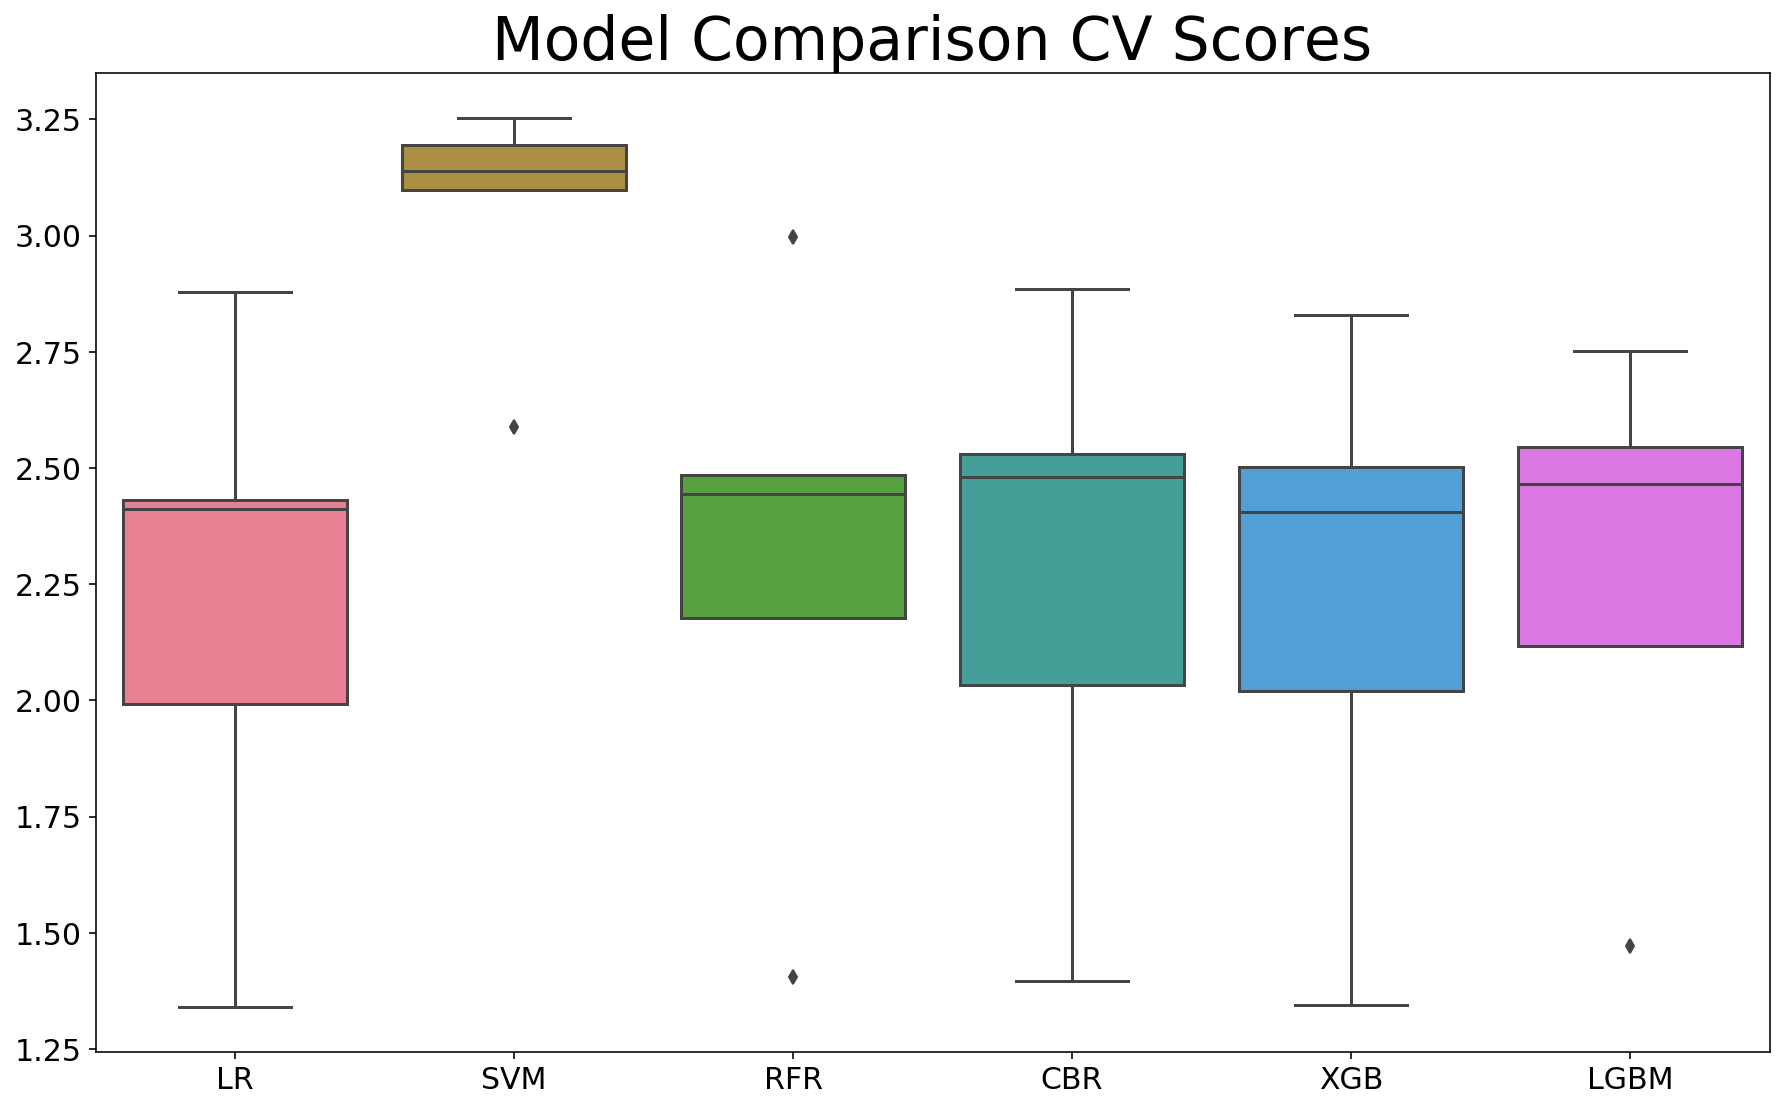

In [807]:
ax = sns.boxplot(x = names, y = results, palette='husl')
plt.title('Model Comparison CV Scores', fontsize=30)

In [808]:
means = [result.mean() for result in results]

In [809]:
means

[2.2105856776431274,
 3.0546277749619,
 2.301494597842402,
 2.2647293982649286,
 2.2203807979041006,
 2.2702582254580723]

Text(0.5, 1.0, 'Model Comparison CV Averages')

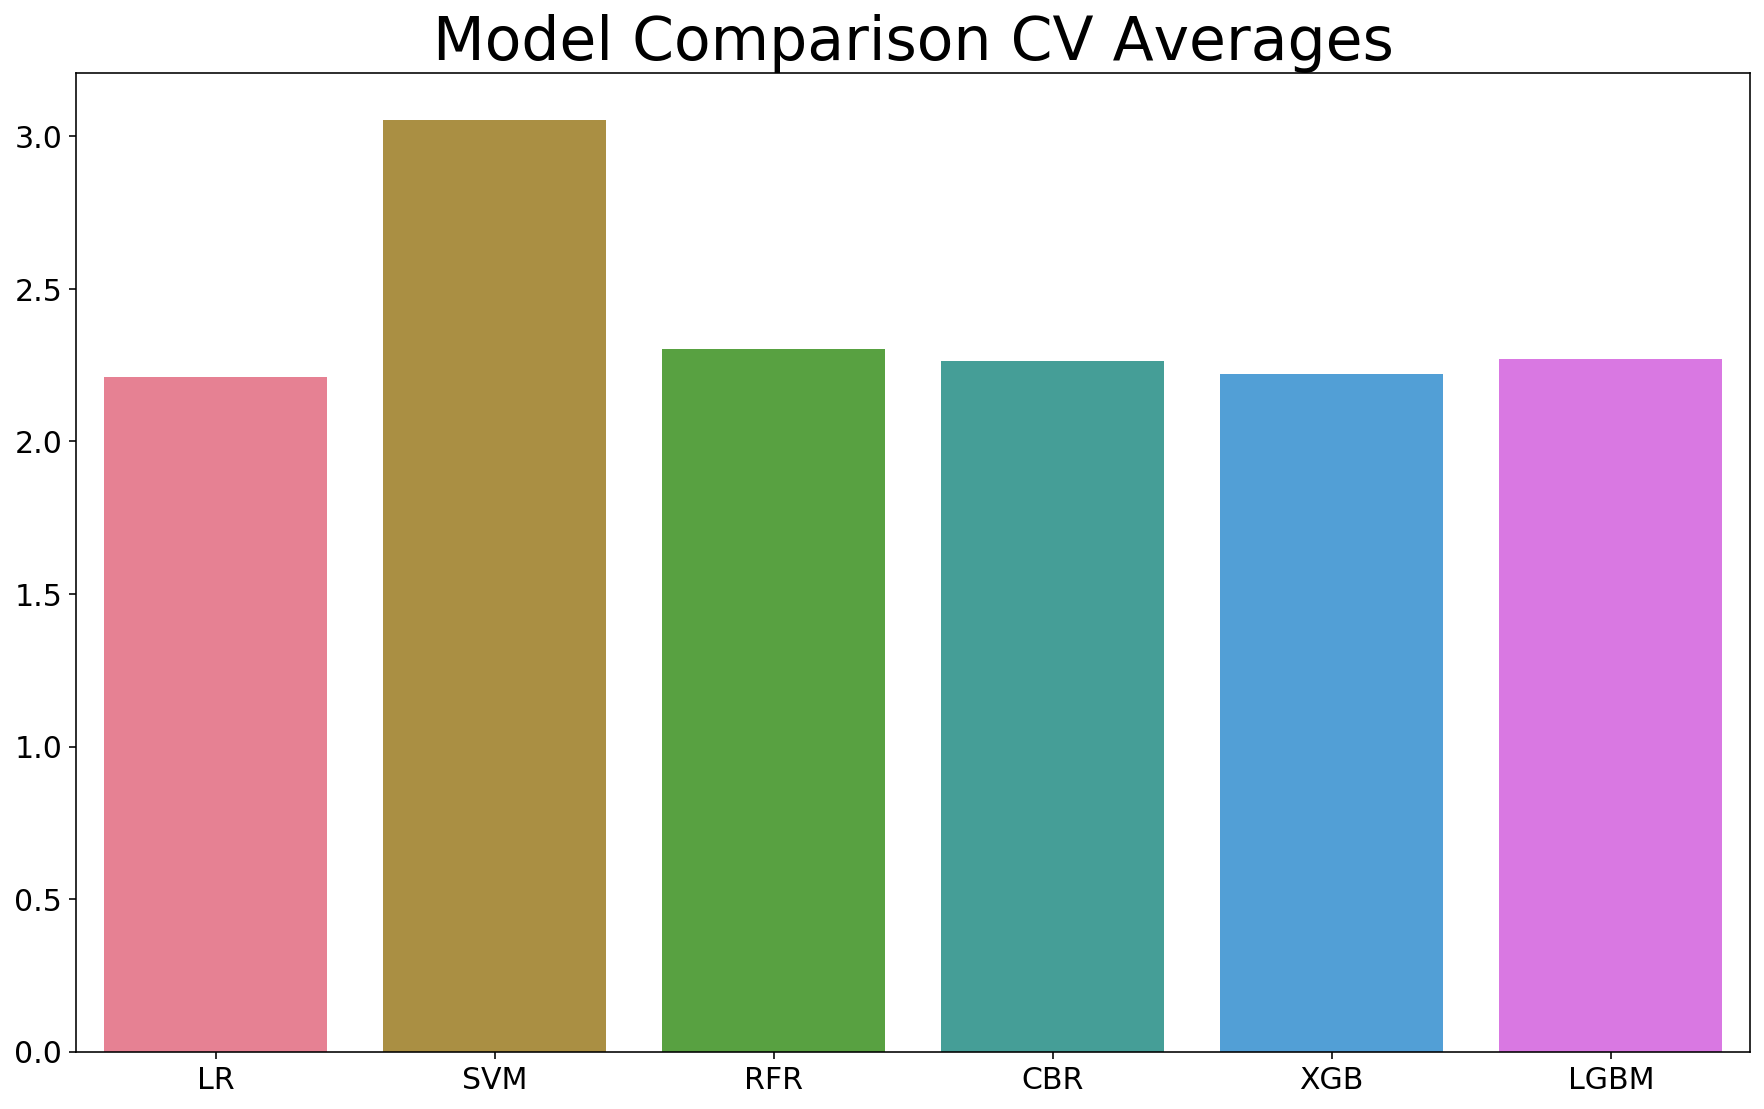

In [810]:
sns.barplot(x=names, y=means, palette='husl')
plt.title('Model Comparison CV Averages', fontsize=30)

In [184]:
from time import gmtime, strftime
import gc

from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from tqdm import tqdm
from sklearn.metrics import (roc_curve, auc, accuracy_score)

### GridsearchCV LGBM

In [251]:
# params = {
#     'application': 'regression', # for binary classification
#     'boosting': 'gbdt', # traditional gradient boosting decision tree
#     'num_iterations': 100, 
#     'learning_rate': 0.05,
#     'num_leaves': 62,
#     'device': 'cpu', # you can use GPU to achieve faster learning
#     'max_depth': -1, # <0 means no limit
#     'max_bin': 510, # Small number of bins may reduce training accuracy but can deal with over-fitting
#     'lambda_l1': 5, # L1 regularization
#     'lambda_l2': 10, # L2 regularization
#     'metric' : 'neg_mean_absolute_error',
#     'subsample_for_bin': 200, # number of samples for constructing bins
#     'subsample': 1, # subsample ratio of the training instance
#     'colsample_bytree': 0.8, # subsample ratio of columns when constructing the tree
#     'min_split_gain': 0.5, # minimum loss reduction required to make further partition on a leaf node of the tree
#     'min_child_weight': 1, # minimum sum of instance weight (hessian) needed in a leaf
#     'min_child_samples': 5# minimum number of data needed in a leaf
# }

# Initiate classifier to use
mdl = lgb.LGBMRegressor(colsample_bytree=0.56, 
                     max_bin= 256, n_estimators= 150, num_leaves= 7, 
                     objective= 'mean_absolute_error', subsample= 0.7)

# To view the default model parameters:
mdl.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq', 'max_bin'])

In [254]:
gridParams = {
    'learning_rate': [0.005, 0.01,.1],
    'n_estimators': [50,100,150],
    'num_leaves': [4,6,7,8], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['mean_absolute_error'],
    'max_bin':[127,255], # large max_bin helps improve accuracy but might slow down training progress
    'colsample_bytree' : [.4,.6,.8],
    'subsample' : [.4,.6,.7,.8],
    'reg_alpha' : [0,.5,1],
    'reg_lambda' : [0,.5,1],
    }

grid = GridSearchCV(mdl, gridParams, scoring = 'neg_mean_absolute_error', verbose=1, cv=4, n_jobs=-1)
# Run the grid
grid.fit(X, y)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 4 folds for each of 15552 candidates, totalling 62208 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 777 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 1477 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 2377 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 3477 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4777 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 6277 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 7977 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 9877 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 11977 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 14277 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 16777 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 19477 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 22377 tasks  

{'boosting_type': 'gbdt', 'colsample_bytree': 0.4, 'learning_rate': 0.01, 'max_bin': 255, 'n_estimators': 150, 'num_leaves': 6, 'objective': 'mean_absolute_error', 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.4}
-2.2152257043901007


In [677]:
badcols = X_tr2.columns.tolist()

Manually training LGBM here, to see if it would help (LGBM is natively very fast, so this was unnecssary)

In [ ]:
lgbm = LGBMRegressor(colsample_bytree=0.56,
                     max_bin= 255, n_estimators= 120, num_leaves= 9, 
                     objective= 'mean_absolute_error', subsample= 0.7)
lgbm.fit(X_tr2, y_train)
print("The mean absolute error for light gradient boost method regression is")
print("Training: {:6.5f}".format(mean_absolute_error(lgbm.predict(X_tr), y_train)))
print("Test Set: {:6.5f}".format(mean_absolute_error(lgbm.predict(X_te), y_test)))

In [685]:
param = {'colsample_bytree':.56, 'objective':'mean_absolute_error','n_estimators':120,'num_leaves':9,
        'subsample':0.7,'max_bin':255}
param['metric']='mae'

In [732]:
#LGBM is fickle and likes the data a certain way only unless you use the prewrapped version (recommended IMO)
x = X.values
Y = y
y = Y.values
x, x_test, y, y_test = train_test_split(x, y, test_size = .2)

train_data = lightgbm.Dataset(x, label=y)
test_data = lightgbm.Dataset(x_test, label=y_test)

In [748]:
parameters = {
    'objective': 'mean_absolute_error',
    'metric': 'mean_absolute_error',
    'boosting': 'gbdt',
    'num_leaves': 7,
    'colsample_bytree':.4,
    'subsample':0.7,
    'n_estimators': 150,
    'learning_rate': 0.1,
    'verbose': 0
}

In [749]:
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[1]	valid_0's l1: 2.99275
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l1: 2.85913
[3]	valid_0's l1: 2.74508
[4]	valid_0's l1: 2.65028
[5]	valid_0's l1: 2.57381
[6]	valid_0's l1: 2.50003
[7]	valid_0's l1: 2.4422
[8]	valid_0's l1: 2.39415
[9]	valid_0's l1: 2.35039
[10]	valid_0's l1: 2.32005
[11]	valid_0's l1: 2.29035
[12]	valid_0's l1: 2.26975
[13]	valid_0's l1: 2.25034
[14]	valid_0's l1: 2.23398
[15]	valid_0's l1: 2.21988
[16]	valid_0's l1: 2.20873
[17]	valid_0's l1: 2.20092
[18]	valid_0's l1: 2.18737
[19]	valid_0's l1: 2.17439
[20]	valid_0's l1: 2.16124
[21]	valid_0's l1: 2.15122
[22]	valid_0's l1: 2.14885
[23]	valid_0's l1: 2.13867
[24]	valid_0's l1: 2.13564
[25]	valid_0's l1: 2.12988
[26]	valid_0's l1: 2.12297
[27]	valid_0's l1: 2.12012
[28]	valid_0's l1: 2.11344
[29]	valid_0's l1: 2.11221
[30]	valid_0's l1: 2.10726
[31]	valid_0's l1: 2.10634
[32]	valid_0's l1: 2.10452
[33]	valid_0's l1: 2.10297
[34]	valid_0's l1: 2.09688
[35]	valid_0's l1: 2.09247
[3

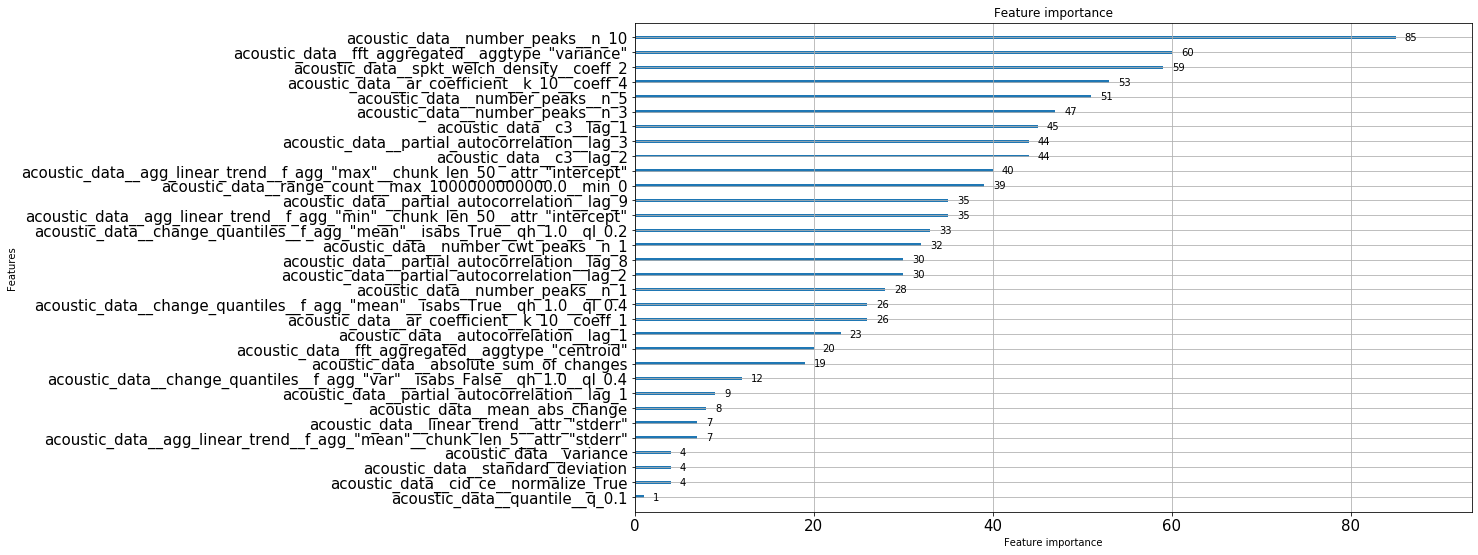

In [679]:
lightgbm.plot_importance(lgbm)

In [753]:
feature_names = ['Number of Peaks(10)','FFT Variance','Spectral Welch Density','AutoRegressive Coefficients','Partial Autocorrelation']

In [754]:
importance_values = [85,60,59,53,44]

Text(0.5, 0, 'Net Change Gini Impurity')

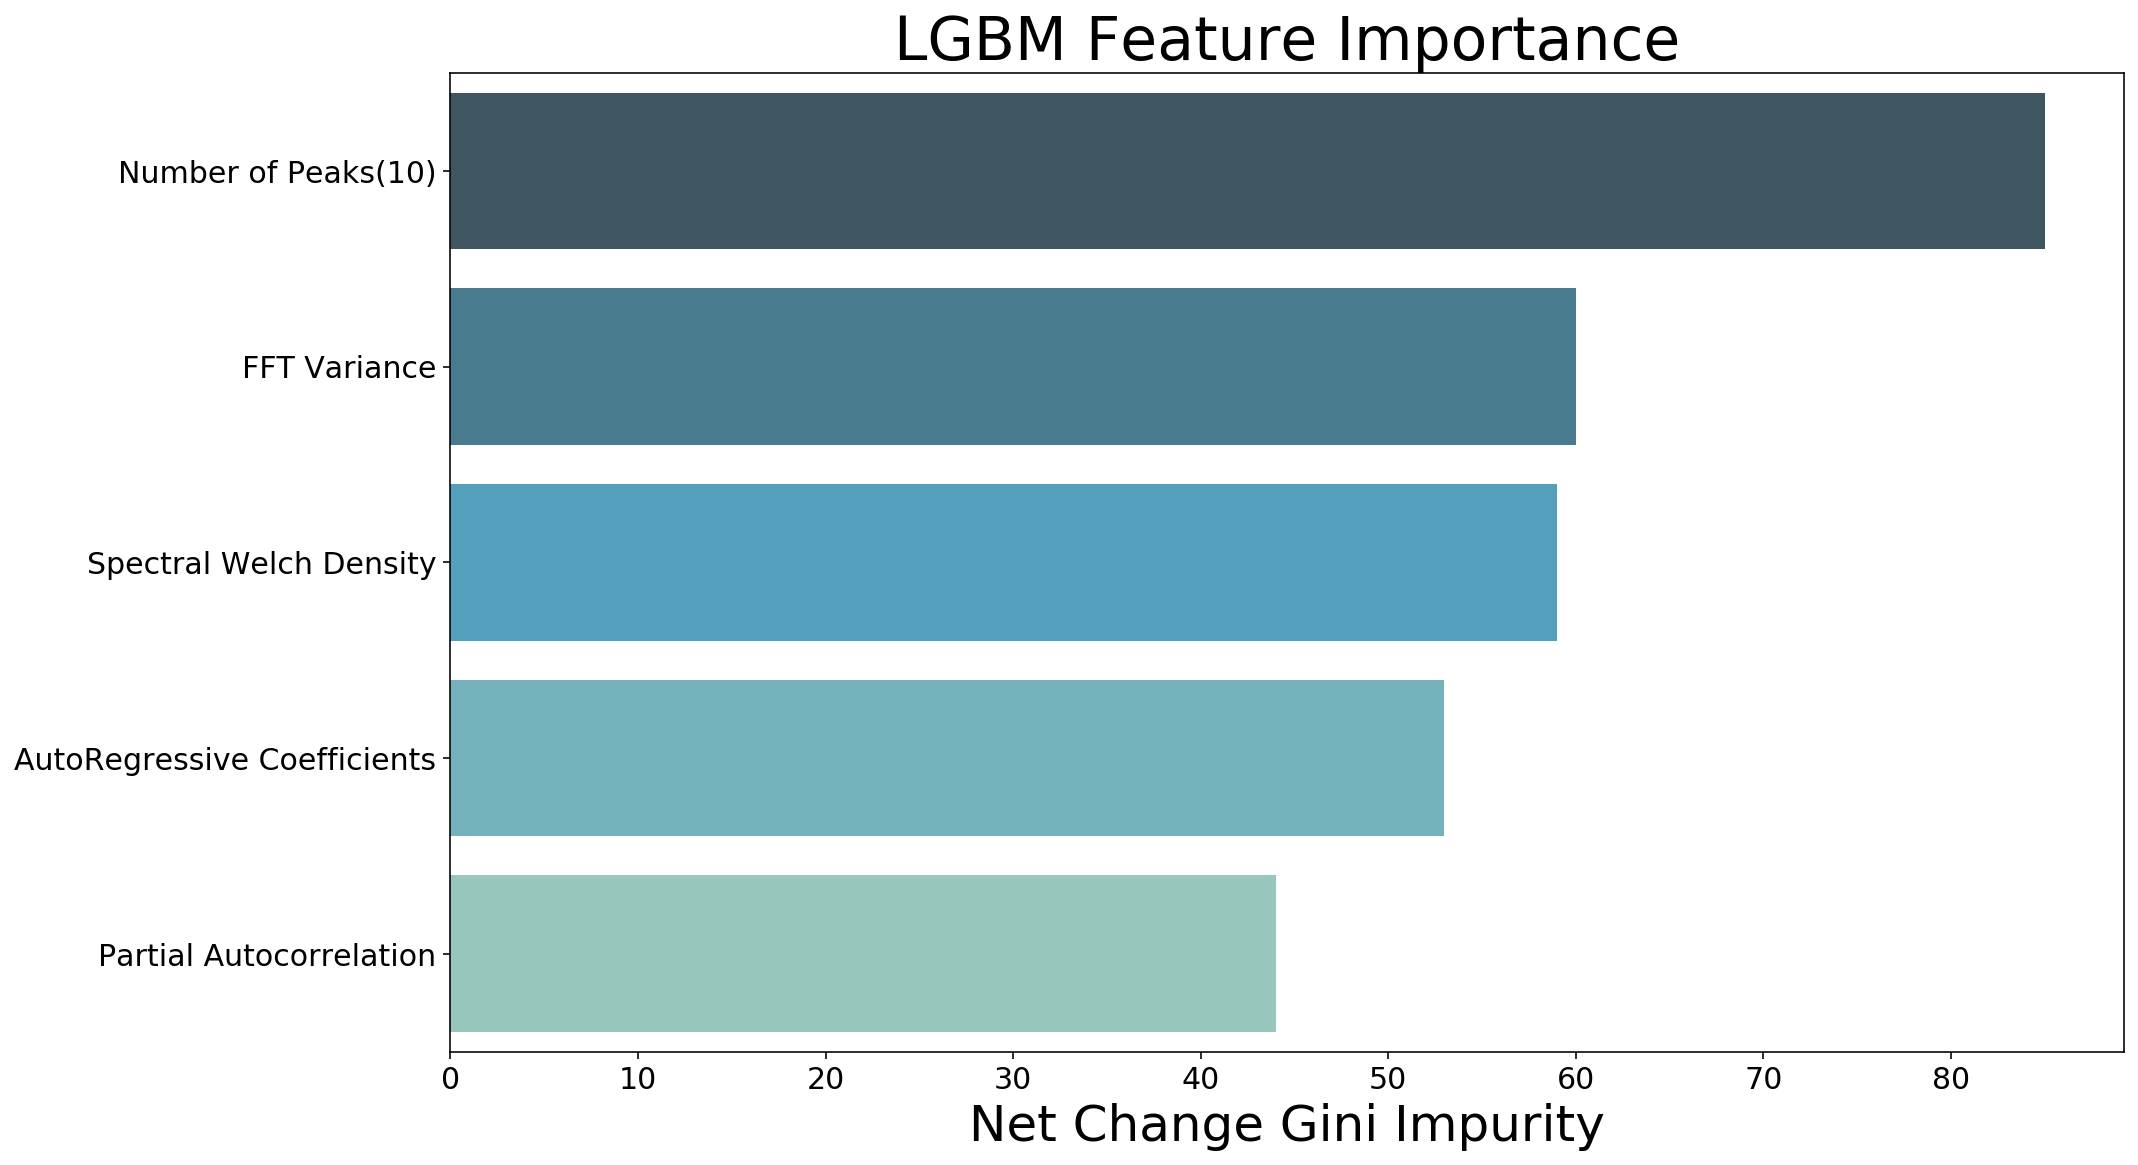

In [801]:
ax = sns.barplot(y = feature_names, x = importance_values, palette='GnBu_d')
plt.title('LGBM Feature Importance', fontsize=30)
ax.set_xlabel('Net Change Gini Impurity', fontsize=25)

### Formatting my predictions for submission

In [169]:
path = 'testfeatures/*'
file = glob.glob(path)
segments = [name[13:] for name in file]

In [101]:
testset = []

In [102]:
for pkl in file:
    with open(pkl,"rb") as pickle_in:        
        testset.append(pickle.load(pickle_in))

In [90]:
with open("testdf","rb") as pickle_in:
    testdf = pickle.load(pickle_in)

In [13]:
testdf = pd.concat(testset)
fittest = std.transform(testdf)

In [166]:
submission = lr.predict(fittest)

In [181]:
#Helper function to get my predictions onto the csv properly formatted
def submission(model, filename):
    pred = model.predict(fittest)
    pd.DataFrame(zip(segments,pred), columns = ['seg_id','time_to_failure']).sort_values(by=['seg_id']).to_csv('submissions/'+filename+'.csv', index=False)

In [182]:
submission(lr, 'testlr')

In [183]:
submission(lgbm, 'lgbm1')

In [328]:
submission(lgbm, 'lgmb2')

In [331]:
submission(lgbm, 'lgbm3')

In [346]:
submission(lgbm, 'lgbm4')

In [439]:
submission(lgbm, 'lgbm5')

In [480]:
submission(lgbm, 'lgbm6')

In [515]:
submission(lgbm, 'lgbm7')

In [670]:
submission(lgbm, 'finallgbm')